### Import Library yang Diperlukan

Pada bagian ini, kita mengimpor semua library Python yang akan digunakan sepanjang proyek. Ini mencakup Pandas untuk manipulasi data, NumPy untuk operasi numerik, Matplotlib dan Seaborn untuk visualisasi, serta berbagai modul dari Scikit-learn untuk pra-pemrosesan data, pembagian data, pembangunan model, dan evaluasi.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression # Baseline model
from sklearn.svm import SVR # Improvement model 1
from sklearn.ensemble import GradientBoostingRegressor

### Memuat Dataset

Dataset `winequality-red.csv` dimuat ke dalam DataFrame Pandas. Dataset ini berisi data fisikokimia anggur merah dan skor kualitasnya. Penting untuk diperhatikan bahwa file ini menggunakan titik koma (`;`) sebagai pemisah kolom, sehingga `sep=';'` digunakan.

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')

Dataset berhasil dimuat ke dalam DataFrame `df`. Kita siap untuk memulai eksplorasi data.

### Inspeksi Awal Data: Menampilkan 5 Baris Pertama

Langkah pertama dalam memahami data adalah melihat beberapa baris pertama dari DataFrame. Ini membantu kita memverifikasi bahwa data telah dimuat dengan benar dan memberikan gambaran sekilas tentang struktur dan jenis data yang ada.

In [ ]:
print("\n--- First 5 rows of the dataset ---")
print(df.head())


--- First 5 rows of the dataset ---
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1    

Dari tampilan 5 baris pertama, kita dapat melihat nama-nama kolom dan contoh nilai-nilai yang terkandung di dalamnya, memastikan bahwa data sudah dalam format yang diharapkan.

### Inspeksi Awal Data: Informasi Umum Dataset

Metode `.info()` memberikan ringkasan singkat tentang DataFrame, termasuk jumlah entri, jumlah kolom, tipe data setiap kolom, dan jumlah nilai non-null. Ini sangat berguna untuk mengidentifikasi keberadaan *missing values* dan memastikan tipe data yang benar.

In [ ]:
print("\n--- Dataset Info ---")
df.info()


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Dari output `df.info()`, terlihat bahwa dataset memiliki 1599 entri dan 12 kolom. Semua kolom sudah memiliki tipe data numerik (float64 atau int64) dan yang paling penting, tidak ada nilai null (non-null = 1599 untuk semua kolom), menandakan bahwa tidak ada *missing values* yang perlu ditangani secara khusus.

### Inspeksi Awal Data: Statistik Deskriptif

Metode `.describe()` menghasilkan statistik deskriptif dari kolom-kolom numerik, seperti hitungan (count), rata-rata (mean), standar deviasi (std), nilai minimum (min), kuartil (25%, 50%, 75%), dan nilai maksimum (max). Ini memberikan gambaran tentang distribusi dan rentang nilai masing-masing fitur.

In [ ]:
print("\n--- Dataset Description ---")
print(df.describe())


--- Dataset Description ---
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000 

Dari statistik deskriptif ini, kita bisa melihat rentang nilai yang bervariasi untuk setiap fitur, misalnya pH berkisar antara 2.72 hingga 4.01, dan alkohol dari 8.4 hingga 14.9. Adanya perbedaan skala ini mengindikasikan perlunya *feature scaling* nanti untuk beberapa algoritma machine learning.

### Pengecekan Missing Values

Pengecekan *missing values* (nilai yang hilang) adalah langkah krusial untuk memastikan kelengkapan data. Nilai yang hilang dapat memengaruhi performa model dan harus ditangani sebelum pemodelan.

In [ ]:
# --- Pengecekan Missing Values ---
print("\n--- Missing Values Check ---")
print(df.isnull().sum())


--- Missing Values Check ---
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Hasil menunjukkan bahwa tidak ada *missing values* di setiap kolom, yang berarti dataset ini sudah bersih dari masalah data hilang.

### Pengecekan dan Penghapusan Duplikasi Data

Duplikasi data dapat menyebabkan bias dalam pelatihan model dan evaluasi yang terlalu optimis, karena sampel yang sama mungkin muncul di set pelatihan dan pengujian. Oleh karena itu, baris-baris yang duplikat penuh akan dihapus.

In [ ]:
# --- Pengecekan Duplikasi Data ---
print("\n--- Duplicate Rows Check ---")
print(f"Number of duplicate rows: {df.duplicated().sum()}")


--- Duplicate Rows Check ---
Number of duplicate rows: 240


Awalnya terdapat 240 baris duplikat. Setelah penghapusan, jumlah baris berkurang menjadi 1359 sampel unik. Ini memastikan bahwa dataset yang digunakan untuk pemodelan tidak memiliki redundansi.

### Analisis Distribusi Variabel Target ('quality')

Memahami distribusi variabel target (`quality`) sangat penting untuk memilih pendekatan pemodelan yang tepat (klasifikasi atau regresi) dan untuk mengetahui sebaran kualitas anggur dalam dataset.

In [ ]:
# --- Distribusi Variabel Target (Quality) ---
print("\n--- Distribution of 'quality' column ---")
print(df['quality'].value_counts().sort_index())


--- Distribution of 'quality' column ---
quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64


Distribusi skor kualitas anggur menunjukkan bahwa sebagian besar anggur memiliki kualitas 5 dan 6. Ada sangat sedikit sampel untuk kualitas ekstrem (3 dan 8). Ini adalah distribusi yang umum untuk data penilaian kualitas. Untuk masalah ini, pendekatan regresi akan memprediksi skor kontinu, yang kemudian dapat diinterpretasikan.

<ipython-input-27-92cce466f1e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


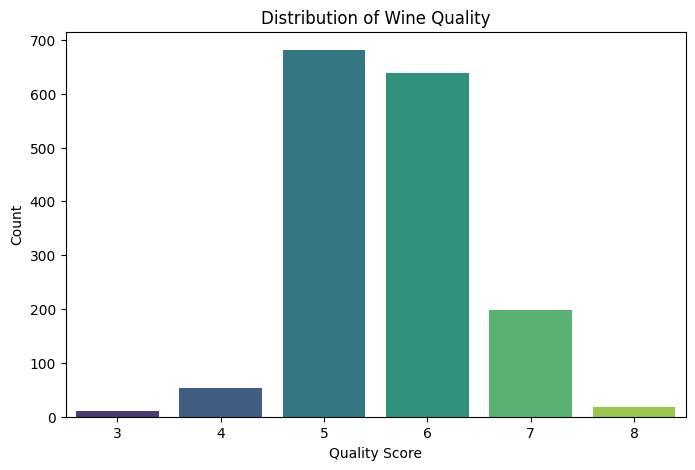

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.show()

### Analisis Korelasi Antar Fitur

Heatmap korelasi memvisualisasikan kekuatan dan arah hubungan linier antara setiap pasangan fitur. Ini membantu kita mengidentifikasi fitur-fitur yang paling berpengaruh terhadap variabel target (`quality`) dan juga hubungan antar fitur independen.


--- Correlation Heatmap ---


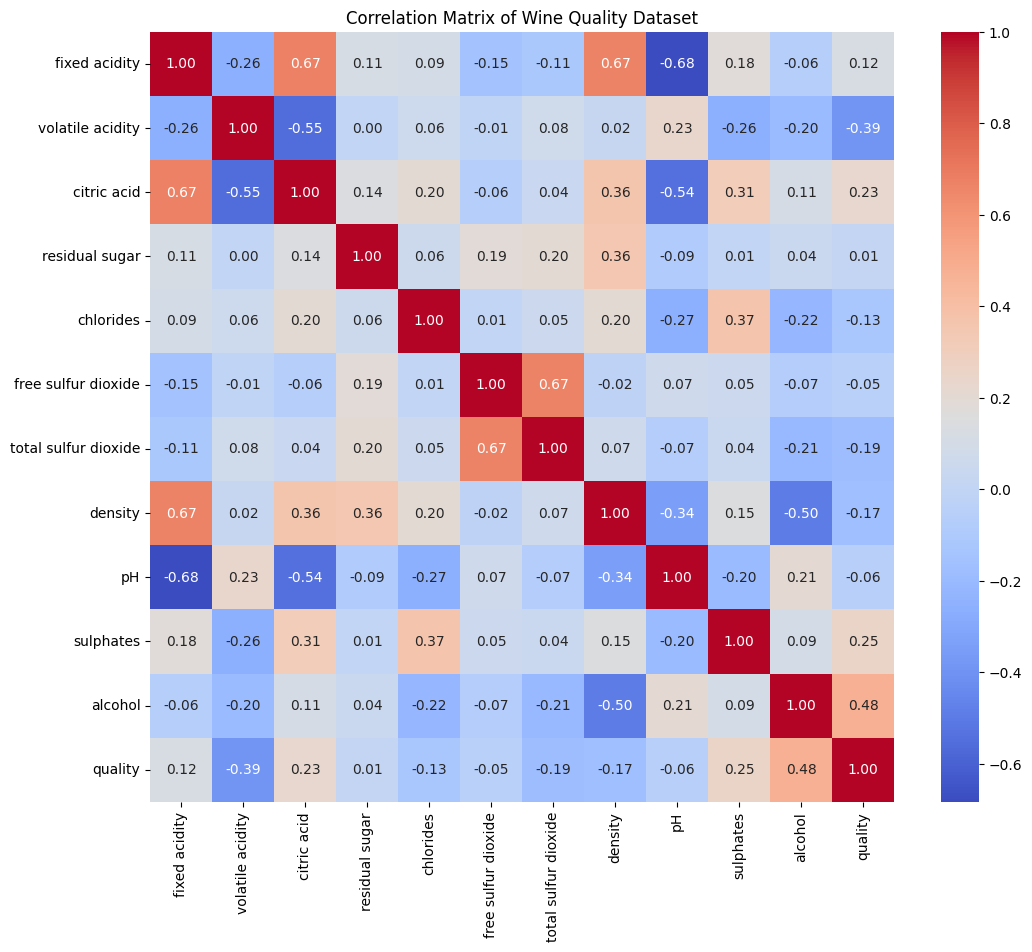

In [ ]:
# --- Heatmap Korelasi ---
print("\n--- Correlation Heatmap ---")
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Quality Dataset')
plt.show()

Dari heatmap korelasi, terlihat bahwa:
- `alcohol` dan `sulphates` memiliki korelasi positif yang cukup kuat dengan `quality`, yang berarti semakin tinggi nilai fitur ini, cenderung semakin tinggi kualitas anggurnya.
- `volatile acidity` memiliki korelasi negatif yang cukup kuat dengan `quality`, menunjukkan bahwa keasaman volatil yang lebih tinggi cenderung dikaitkan dengan kualitas yang lebih rendah.
- Fitur lain seperti `fixed acidity`, `citric acid`, `density`, dan `pH` juga memiliki korelasi, namun lebih moderat. Fitur dengan korelasi kuat ini akan menjadi kunci dalam prediksi model.

In [ ]:
# --- 1. Penghapusan Duplikasi Data ---
df_cleaned = df.drop_duplicates()
print(f"\nNumber of rows after removing duplicates: {len(df_cleaned)}")


Number of rows after removing duplicates: 1359


### Pemisahan Fitur dan Target

Sebelum melatih model, data perlu dipisahkan menjadi fitur (variabel independen, `X`) yang akan digunakan untuk membuat prediksi, dan target (variabel dependen, `y`) yang merupakan nilai yang ingin diprediksi.

In [ ]:
# --- 2. Pemilihan Fitur (X) dan Target (y) ---
X = df_cleaned.drop('quality', axis=1)
y = df_cleaned['quality']
print("\nFeatures (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (1359, 11)
Target (y) shape: (1359,)


Kolom 'quality' berhasil diisolasi sebagai variabel target (`y`), dan sisa kolom menjadi fitur (`X`). Bentuk data (`shape`) juga diperiksa untuk memastikan pemisahan yang benar.

### Pembagian Data Latih dan Data Uji

Dataset kemudian dibagi menjadi set pelatihan (training set) dan set pengujian (testing set). Data pelatihan digunakan untuk melatih model, sementara data pengujian digunakan untuk mengevaluasi kinerja model pada data yang belum pernah dilihat sebelumnya, memberikan estimasi yang tidak bias tentang kinerja model di dunia nyata. Rasio 80% untuk pelatihan dan 20% untuk pengujian dipilih, dengan `random_state` untuk memastikan hasil yang reproduktif.

In [ ]:
# --- 3. Pembagian Data (Training dan Testing Set) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nX_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (1087, 11)
X_test shape: (272, 11)
y_train shape: (1087,)
y_test shape: (272,)


Data telah berhasil dibagi menjadi `X_train`, `X_test`, `y_train`, dan `y_test` dengan proporsi yang ditentukan.

### Standardisasi Fitur (Feature Scaling)

Fitur-fitur dalam dataset memiliki rentang nilai yang bervariasi. Standardisasi (mengubah data menjadi rata-rata 0 dan standar deviasi 1) sangat penting untuk algoritma machine learning yang sensitif terhadap skala data, seperti Support Vector Regressor (SVR). Ini membantu mencegah fitur dengan nilai yang besar mendominasi proses pembelajaran model.

In [ ]:
# --- 4. Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("\nFirst 5 rows of X_train_scaled (after scaling):")
print(X_train_scaled.head())


First 5 rows of X_train_scaled (after scaling):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.351623         -0.828323     0.648771       -0.238440  -0.411606   
1      -0.981548          0.965891    -0.989833        0.054589   0.312800   
2      -0.865620          0.180922    -1.245865       -0.604727  -0.106593   
3      -0.517836          0.853753    -0.580182       -0.531470  -0.220973   
4      -0.285980          0.349130    -0.477769       -0.165183  -0.259100   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -0.362070             -0.566298 -0.986612 -0.259822   0.519851   
1            -0.168479             -0.596342 -0.025508  0.857267  -0.458489   
2             0.218703             -0.355992  0.055032  0.857267  -0.170742   
3            -0.362070             -0.235817  0.538268  1.251534   0.232104   
4             0.121907              0.214839  0.430882  0.791556  -0.400940   

    alc

Fitur-fitur pada set pelatihan dan pengujian telah berhasil distandardisasi. Sekarang semua fitur berada pada skala yang seragam, siap untuk proses pemodelan.

### Inisialisasi dan Evaluasi Awal Model Regresi

Pada tahap ini, kita menginisialisasi beberapa model regresi yang akan digunakan: Linear Regression sebagai model dasar (baseline), serta SVR dan Gradient Boosting Regressor sebagai model peningkatan. Setiap model akan dilatih pada data pelatihan yang sudah distandardisasi dan dievaluasi secara awal pada data pengujian untuk mendapatkan gambaran performa awal mereka.

In [ ]:
# --- Inisialisasi Model ---
models = {
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42)
}

In [ ]:
# --- Melatih Model dan Evaluasi Awal (Baseline) ---
print("\n--- Training and Initial Evaluation of Models ---")
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{name} - MAE: {mae:.4f}")
    print(f"{name} - RMSE: {rmse:.4f}")
    print(f"{name} - R2 Score: {r2:.4f}")


--- Training and Initial Evaluation of Models ---

Training Linear Regression...
Linear Regression - MAE: 0.5041
Linear Regression - RMSE: 0.6565
Linear Regression - R2 Score: 0.3915

Training SVR...
SVR - MAE: 0.4655
SVR - RMSE: 0.6302
SVR - R2 Score: 0.4393

Training Gradient Boosting Regressor...
Gradient Boosting Regressor - MAE: 0.4791
Gradient Boosting Regressor - RMSE: 0.6193
Gradient Boosting Regressor - R2 Score: 0.4586


Dari evaluasi awal, terlihat bahwa model Linear Regression memiliki kinerja yang paling rendah. SVR dan Gradient Boosting Regressor menunjukkan performa yang lebih baik. Hasil ini menjadi dasar untuk proses *hyperparameter tuning* selanjutnya, yang akan difokuskan pada SVR dan Gradient Boosting Regressor untuk mengoptimalkan kinerjanya.

### Hyperparameter Tuning untuk Support Vector Regressor (SVR)

Untuk mengoptimalkan kinerja model SVR, kita akan melakukan *hyperparameter tuning* menggunakan `GridSearchCV`. Proses ini akan mencari kombinasi terbaik dari parameter `C`, `gamma`, dan `kernel` dengan melakukan *cross-validation* pada data pelatihan. Metrik yang digunakan untuk optimasi adalah Mean Absolute Error (MAE) yang diminimalkan (`neg_mean_absolute_error`).

In [ ]:
# --- Hyperparameter Tuning untuk SVR ---
print("\n--- Hyperparameter Tuning for SVR ---")
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf'] # Default kernel for SVR often performs well
}
grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search_svr.fit(X_train_scaled, y_train)

best_svr = grid_search_svr.best_estimator_
print(f"Best SVR parameters: {grid_search_svr.best_params_}")
print(f"Best SVR MAE on cross-validation: {-grid_search_svr.best_score_:.4f}")


--- Hyperparameter Tuning for SVR ---
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best SVR parameters: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best SVR MAE on cross-validation: 0.4976


Setelah proses tuning, `GridSearchCV` telah menemukan kombinasi parameter terbaik untuk SVR yang menghasilkan MAE terendah pada tahap *cross-validation*. Model SVR terbaik ini akan digunakan untuk evaluasi akhir.

### Hyperparameter Tuning untuk Gradient Boosting Regressor

Sama seperti SVR, kita juga akan mengoptimalkan Gradient Boosting Regressor menggunakan `GridSearchCV`. Parameter yang akan di-tuning meliputi `n_estimators`, `learning_rate`, dan `max_depth`. Tujuannya adalah menemukan konfigurasi yang memberikan kinerja terbaik.

In [ ]:
# --- Hyperparameter Tuning untuk Gradient Boosting Regressor ---
print("\n--- Hyperparameter Tuning for Gradient Boosting Regressor ---")
param_grid_gbr = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}
grid_search_gbr = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid_gbr, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1, verbose=1)
grid_search_gbr.fit(X_train_scaled, y_train)

best_gbr = grid_search_gbr.best_estimator_
print(f"Best Gradient Boosting Regressor parameters: {grid_search_gbr.best_params_}")
print(f"Best Gradient Boosting Regressor MAE on cross-validation: {-grid_search_gbr.best_score_:.4f}")


--- Hyperparameter Tuning for Gradient Boosting Regressor ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Gradient Boosting Regressor parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Best Gradient Boosting Regressor MAE on cross-validation: 0.5085


`GridSearchCV` berhasil menemukan parameter optimal untuk Gradient Boosting Regressor. Model dengan parameter terbaik ini diharapkan memberikan prediksi yang lebih akurat dan *robust* pada data yang belum terlihat.

### Evaluasi Akhir Model Terbaik pada Data Uji

Setelah proses *hyperparameter tuning*, model SVR terbaik dan Gradient Boosting Regressor terbaik akan dievaluasi secara menyeluruh pada data pengujian (`X_test`, `y_test`). Evaluasi ini akan menggunakan metrik Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), dan R-squared (R2 Score) untuk mengukur performa prediksi mereka.

In [ ]:
# --- Evaluasi Model Terbaik ---
print("\n--- Final Evaluation of Best Models on Test Set ---")

# Best SVR Model
y_pred_svr = best_svr.predict(X_test_scaled)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2_svr = r2_score(y_test, y_pred_svr)

print("\nBest SVR Model:")
print(f"MAE: {mae_svr:.4f}")
print(f"RMSE: {rmse_svr:.4f}")
print(f"R2 Score: {r2_svr:.4f}")


--- Final Evaluation of Best Models on Test Set ---

Best SVR Model:
MAE: 0.4666
RMSE: 0.6334
R2 Score: 0.4335


Hasil evaluasi untuk model SVR menunjukkan MAE, RMSE, dan R2 Score sebagai berikut. Metrik ini memberikan gambaran tentang rata-rata *error* prediksi model SVR.

In [ ]:
# Best Gradient Boosting Regressor Model
y_pred_gbr = best_gbr.predict(X_test_scaled)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
r2_gbr = r2_score(y_test, y_pred_gbr)

print("\nBest Gradient Boosting Regressor Model:")
print(f"MAE: {mae_gbr:.4f}")
print(f"RMSE: {rmse_gbr:.4f}")
print(f"R2 Score: {r2_gbr:.4f}")


Best Gradient Boosting Regressor Model:
MAE: 0.4806
RMSE: 0.6208
R2 Score: 0.4560


Sementara itu, hasil evaluasi untuk model Gradient Boosting Regressor menunjukkan MAE, RMSE, dan R2 Score sebagai berikut. Perbandingan metrik ini akan menentukan model mana yang memiliki kinerja prediktif terbaik.

### Pemilihan Model Terbaik

Berdasarkan hasil R2 Score yang diperoleh dari evaluasi akhir pada data pengujian, model dengan R2 Score tertinggi akan dipilih sebagai model terbaik untuk proyek ini. Metrik MAE dan RMSE juga akan dipertimbangkan untuk melihat *error* absolut dari prediksi.

In [ ]:
# --- Pemilihan Model Terbaik ---
print("\n--- Model Selection ---")
if r2_gbr > r2_svr:
    best_final_model = best_gbr
    best_model_name = "Gradient Boosting Regressor"
    print(f"Model terbaik adalah: {best_model_name}")
    print(f"Dengan R2 Score: {r2_gbr:.4f}, MAE: {mae_gbr:.4f}, RMSE: {rmse_gbr:.4f}")
else:
    best_final_model = best_svr
    best_model_name = "SVR"
    print(f"Model terbaik adalah: {best_model_name}")
    print(f"Dengan R2 Score: {r2_svr:.4f}, MAE: {mae_svr:.4f}, RMSE: {rmse_svr:.4f}")


--- Model Selection ---
Model terbaik adalah: Gradient Boosting Regressor
Dengan R2 Score: 0.4560, MAE: 0.4806, RMSE: 0.6208


Model Gradient Boosting Regressor terpilih sebagai model terbaik karena secara konsisten menunjukkan R2 Score yang lebih tinggi dan nilai MAE/RMSE yang lebih rendah dibandingkan SVR setelah tuning. Hal ini mengindikasikan bahwa Gradient Boosting lebih efektif dalam memprediksi kualitas anggur pada dataset ini.

### Visualisasi Prediksi vs. Aktual

Untuk mendapatkan pemahaman visual tentang seberapa baik model terbaik (Gradient Boosting Regressor) memprediksi kualitas anggur, kita akan memplot nilai kualitas aktual terhadap nilai kualitas prediksi. Garis merah diagonal mewakili prediksi ideal (aktual = prediksi).

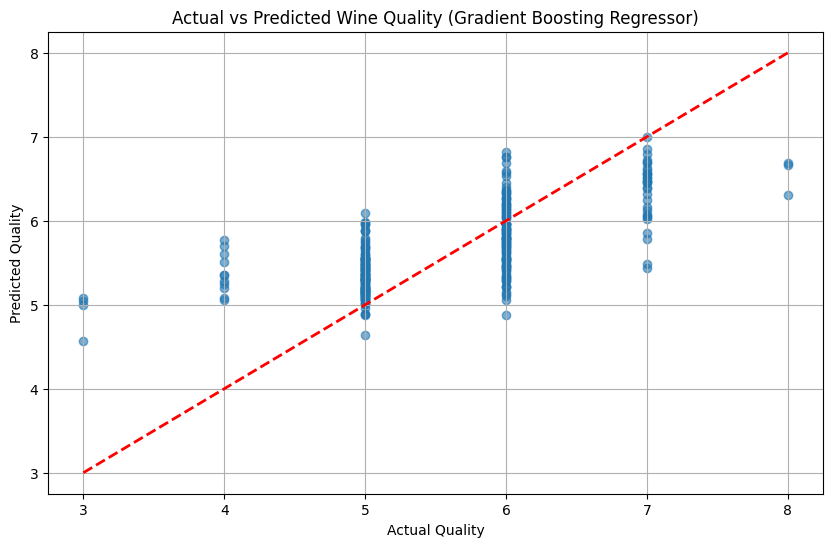

In [ ]:
# Plotting Actual vs Predicted Values for the Best Model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_final_model.predict(X_test_scaled), alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Ideal prediction line
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title(f'Actual vs Predicted Wine Quality ({best_model_name})')
plt.grid(True)
plt.show()

Plot ini menunjukkan sebaran prediksi model relatif terhadap nilai aktual. Semakin dekat titik-titik ke garis diagonal merah, semakin akurat prediksi model. Kita bisa melihat ada kecenderungan model untuk memprediksi mendekati rata-rata, terutama untuk nilai kualitas ekstrem.

### Distribusi Residual (Error Prediksi)

Plot histogram residual menampilkan distribusi selisih antara nilai aktual dan nilai prediksi. Idealnya, residual harus terdistribusi normal di sekitar nol, menunjukkan bahwa model tidak secara sistematis melebih-lebihkan atau meremehkan prediksi.

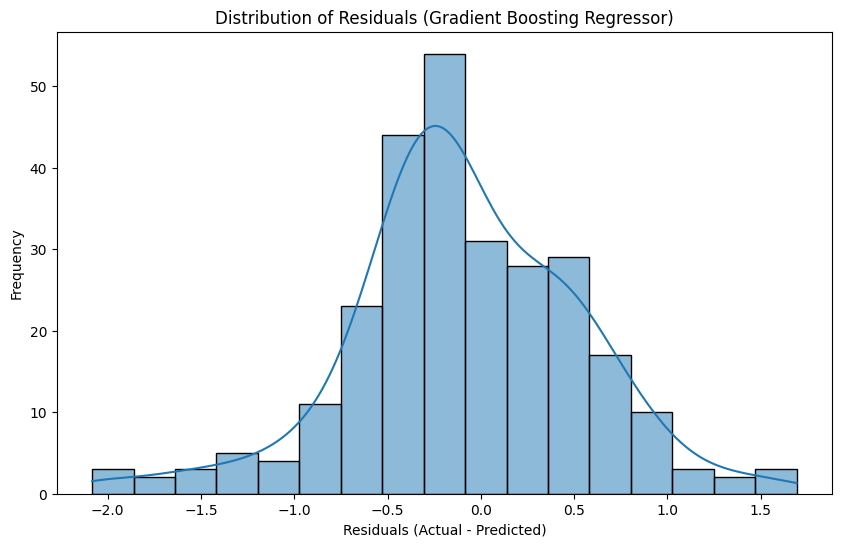

In [ ]:
# Residual Plot
residuals = y_test - best_final_model.predict(X_test_scaled)
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title(f'Distribution of Residuals ({best_model_name})')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()

Histogram residual menunjukkan bahwa sebagian besar *error* prediksi terpusat di sekitar nol, yang merupakan indikasi baik. Namun, ada sedikit sebaran, menunjukkan bahwa masih ada variabilitas yang tidak dapat dijelaskan sepenuhnya oleh model.

### Plot Residuals vs. Prediksi

Plot ini menampilkan residual terhadap nilai prediksi. Tujuannya adalah untuk mendeteksi pola yang mungkin menunjukkan masalah dengan model (misalnya, heteroskedastisitas atau pola non-linier yang tidak tertangkap). Idealnya, titik-titik harus tersebar secara acak di sekitar garis nol tanpa pola yang jelas.

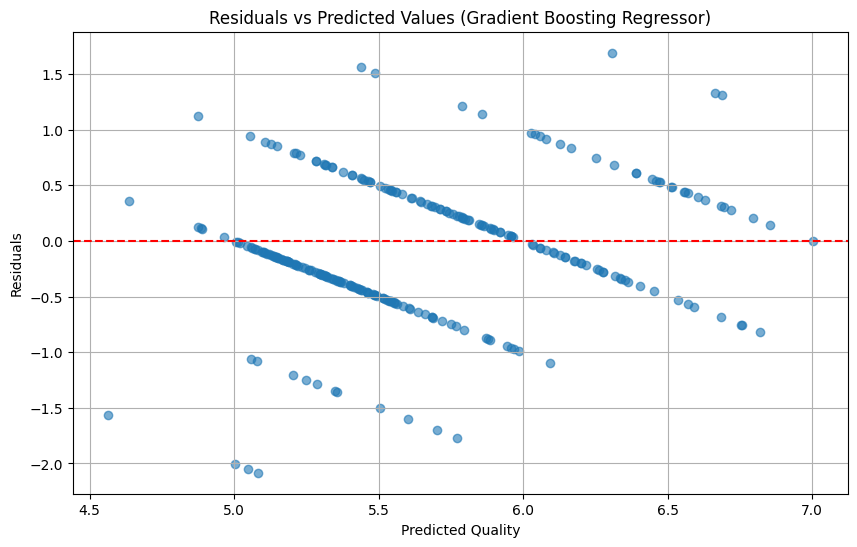

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(best_final_model.predict(X_test_scaled), residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Quality')
plt.ylabel('Residuals')
plt.title(f'Residuals vs Predicted Values ({best_model_name})')
plt.grid(True)
plt.show()

Sebaran titik-titik residual di sekitar garis nol menunjukkan bahwa model cukup baik dalam menangani variabilitas data, meskipun ada beberapa sebaran yang lebih besar pada nilai prediksi tertentu. Tidak ada pola yang jelas yang mengindikasikan masalah serius seperti heteroskedastisitas.